# Versuch 6
## Dissoziationsgleichgewicht von $\mathrm{N}_2\mathrm{O}_4$
Zu Beginn werden alle für die Auswertung notwendigen Module importiert. Welche Module könntet ihr wie üblich für die Auswertung brauchen?

Falls euch nachträglich Module einfallen, könnt ihr diese jederzeit hier ergänzen. Achtet dabei aber darauf, den entsprechenden Code dann auch erneut auszuführen!

In [1]:
from Hilfsdateien.importe_Bibliotheken import *

Außerdem könnten einige Naturkonstanten später in der Auswertung hilfreich sein. Diese können wir aus <code>scipy.constants</code> importieren. Hilfreich kann außerdem sein, weitere Konstanten wie den Studentschen $t$-Wert zu Beginn zu definieren und Konstanten wie $\epsilon$ zu definieren. Achtet wenn notwendig auf die Einheiten!

In [2]:
from Hilfsdateien.importe_Konstanten import *
epsilon = 15.2 #m² /mol
d = 2.1e-02 #m
delta_d = 1.0e-03 #m
delta_T = 0.1 #K
delta_p = 100 #Pa
dIIref = 0.005
Ikorr = 0

### Erster Auswertungsschritt
Wie üblich wollen wir zunächst alle unsere Messdaten einlesen. Es wird davon ausgegangen, dass in einer Datei das Absorbanzspektrum gespeichert ist und die einzelnen Messreihen ebenfalls in einzelnen Messreihen gespeichert sind. Zu Beginn wollen wir das Absorbanzspektrum einlesen. Mit welchem Befehl geschieht dies üblicherweise und welche Optionen könnten für uns nützlich sein?

In [3]:
data_dir = "data_v6/"
absorption = np.genfromtxt(data_dir + "absorbanz.dat",skip_header=1,dtype=float)

Die einzelnen Messreihen können getrennt vom Absorptionsspektrum in einem 3D-Array aus $n$ Messreihen mit $k$ Messwerten und $j$ Messgrößen gespeichert werden. Daher könnt ihr zunächst mit NumPy ein leeres 3D-Array mit den entsprechenden Dimensionen erstellen.

In [4]:
n,k,j = 9,9,3
temp_arr = np.empty((n,k,j))

T_arr = np.array([298.45,302.95,313.05,318.15,323.15,328.15,333.16,338.15,343.05])

Den einzelnen Indizes müssen nun unsere Messwerte zugewiesen werden. Hierzu könnt ihr mit einer <code>for</code>-Schleife über den Index $n$ iterieren und beim $n$-ten Element die $n$-te Datei einlesen. Die Datei sollte idealerweise in Spalten unterteilt sein und nachfolgend wird davon ausgegangen, dass das letzte Element den Messwerten der evakuierten Zelle bei der jeweiligen Messbedingung entspricht. Kontrolliert vor der weiteren Auswertung, ob das Array korrekt eingelesen wurde.

In [5]:
for i in range(n):
    temp_arr[i] = np.genfromtxt(data_dir + "T"+str(i)+".dat",skip_header=1,dtype=float)
print(absorption)

[[3.700e+02 5.160e+00 4.400e-01 5.400e+00 5.350e+00]
 [3.800e+02 7.700e+00 7.600e-01 7.330e+00 7.380e+00]
 [3.900e+02 1.090e+01 1.140e+00 9.400e+00 9.450e+00]
 [4.000e+02 1.393e+01 1.490e+00 1.106e+01 1.114e+01]
 [4.100e+02 1.428e+01 1.800e+00 1.213e+01 1.200e+01]
 [4.200e+02 1.427e+01 2.200e+00 1.292e+01 1.281e+01]
 [4.300e+02 1.427e+01 2.720e+00 1.335e+01 1.329e+01]
 [4.400e+02 1.426e+01 3.470e+00 1.374e+01 1.371e+01]
 [4.500e+02 1.426e+01 3.900e+00 1.302e+01 1.311e+01]
 [4.600e+02 1.428e+01 3.660e+00 1.098e+01 1.105e+01]
 [4.700e+02 1.428e+01 3.930e+00 9.090e+00 9.170e+00]
 [4.800e+02 1.005e+01 3.020e+00 6.310e+00 6.190e+00]
 [4.900e+02 7.650e+00 2.800e+00 4.670e+00 4.680e+00]
 [5.000e+02 6.230e+00 2.740e+00 3.550e+00 3.670e+00]]


Nachdem nun alle Daten eingelesen sind, soll ein Absorptionsspektrum geplottet werden. Hierzu müssen wir jedoch zunächst die Absorbanz $A$ aus den Intensitäten $I$ bzw. $I_0$ berechnen. Hierzu wollen wir SymPy nutzen, welches uns ermöglicht eine Funktion $A(I_1,I_0)$ zu erstellen und die Ableitungen von $A$ zu ermitteln. Zunächst müssen die Variablen als „Symbole“ für SymPy erstellt werden. Wie könnt ihr dies machen? Nachdem die Ausdrücke definiert haben, müssen diese mittels eines weiteren SymPy-Befehls in aufrufbare Funktionen überführt werden (GIYF, eine [anonyme Funktion](https://de.wikipedia.org/wiki/Anonyme_Funktion) wird oftmals lambda-Funktion genannt!). An diese Funktion können wir dann die Messwerte übergeben und erhalten $A$ als Ergebnis.

In [6]:

I,dI,I0,dI0,Iref,dIref,Iref0,dIref0 = symbols('I ΔI I_0 ΔI_0 I_ref ΔI_ref I_ref_0 ΔI_ref_0')
A = -log(I/I0,10) - (-log(Iref/Iref0,10))
dA = sqrt((diff(A,I)*dI)**2 + (diff(A,I0)*dI0)**2 + (diff(A,Iref)*dIref)**2 + (diff(A,Iref0)*dIref0)**2)

A = lambdify([I,I0,Iref,Iref0],A,'numpy')
dA = lambdify([I,dI,I0,dI0,Iref,dIref,Iref0,dIref0],dA,'numpy')

absorbanz = A(absorption[:,2],absorption[:,1],absorption[:,4],absorption[:,3])
dabsorbanz = dA(absorption[:,2],dIIref,absorption[:,1],dIIref,absorption[:,4],dIIref,absorption[:,3],dIIref)
print(absorbanz,dabsorbanz)

[1.065 1.009 0.983 0.974 0.895 0.808 0.718 0.613 0.566 0.594 0.564 0.514
 0.437 0.371] [0.005 0.003 0.002 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001]


Dieses Ergebnis ist nun als Funktion der Wellenlänge $\lambda$ aufzutragen. Vergesst nicht die Fehlerbalken und achtet auf die Achsenbeschriftung, Legende, etc.!

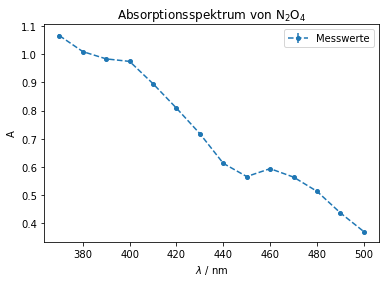

In [7]:
plt.errorbar(absorption[:,0],absorbanz,yerr=dabsorbanz,ls='--',marker='o',markersize=4,label="Messwerte")
plt.xlabel("$\lambda$ / nm")
plt.ylabel("A")
plt.legend()
plt.title("Absorptionsspektrum von N$_{2}$O$_{4}$")
plt.show()
plt.close()

## Zweiter Auswertungsschritt
Nun ist es von euch gefordert, eine Apparaturkonstante $a$ zu bestimmen. Diese wird nach der im Skript gegebenen Gleichung
\begin{align}
a = \frac{\epsilon\cdot d}{R\cdot T}
\end{align}
 mit der universellen Gaskonstanten $R$ und einer Küvettenlänge $d$ aus dem Extinktionskoeffizienten $\epsilon$ bei einer Temperatur $T$ erhalten. Analog zu $A$ solltet ihr mit SymPy nun je eine Funktion erstellen, welche euch $a$ und daraus dessen Unsicherheit $\Delta a$ berechnet.

In [8]:
eps,l,dl,T,dT = symbols('ε l Δl T ΔT')
a = eps*l/(R*T)
da = sqrt((diff(a,l)*dl)**2 + (diff(a,T)*dT)**2)

a = lambdify([eps,l,T],a,'numpy')
da = lambdify([eps,l,dl,T,dT],da,'numpy')

a_arr = a(epsilon,d,T_arr) #pro Pa
print(a_arr*10**5)
da_arr = da(epsilon,d,delta_d,T_arr,delta_T) # pro Pa

[12.863 12.672 12.264 12.067 11.88  11.699 11.523 11.353 11.191]


## Dritter Auswertungsschritt
Nachfolgend sollt ihr für alle Messpunkte die Absorbanz und anhand dieser den Partialdruck $p\left(\mathrm{NO}_2\right)$ (Formel steht im Praktikumsskript) bestimmen. Wie helfen euch hierbei die soeben erstellten Funktionen? Analog zu $A$ und $a$ solltet ihr SymPy für diesen Schritt nutzen.

In [9]:
Abs, dAbs, apConst,dapConst = symbols('A ΔA a Δa')
pNO2 = Abs/apConst
dpNO2 = sqrt((diff(pNO2,Abs)*dAbs)**2 +  (diff(pNO2,apConst)*dapConst)**2)

pNO2 = lambdify([Abs,apConst],pNO2,'numpy')
dpNO2 = lambdify([Abs,dAbs,apConst,dapConst],dpNO2,'numpy')
p_NO2 = np.empty((n,k-1))
dp_NO2 = np.empty((n,k-1))
for i in range(n):
    p_NO2[i] = pNO2(A(temp_arr[i,:-1,1],temp_arr[i,-1,1],temp_arr[i,:-1,2],temp_arr[i,-1,2]),a_arr[i])
    dp_NO2[i]= dpNO2(A(temp_arr[i,:-1,1],temp_arr[i,-1,1],temp_arr[i,:-1,2],temp_arr[i,-1,2]),dA(temp_arr[i,:-1,1],dIIref,temp_arr[i,-1,1],dIIref,temp_arr[i,:-1,2],dIIref,temp_arr[i,-1,2],dIIref),a_arr[i],da_arr[i])
print(p_NO2/10**5)

[[0.143 0.129 0.114 0.098 0.08  0.063 0.049 0.033]
 [0.16  0.145 0.128 0.108 0.088 0.069 0.053 0.036]
 [0.151 0.145 0.129 0.114 0.097 0.079 0.06  0.04 ]
 [0.164 0.156 0.139 0.121 0.102 0.083 0.063 0.041]
 [0.17  0.164 0.146 0.127 0.107 0.086 0.065 0.042]
 [0.18  0.173 0.153 0.132 0.111 0.089 0.067 0.043]
 [0.187 0.179 0.157 0.136 0.114 0.091 0.068 0.043]
 [0.19  0.182 0.162 0.139 0.116 0.093 0.069 0.044]
 [0.194 0.185 0.162 0.142 0.117 0.094 0.07  0.044]]


Um die Gleichgewichtskonstante $K_\mathrm{p}$ zu erhalten, brauchen wir jedoch noch den Partialdruck von Distickstofftetraoxid. Wie können wir diesen nun aus dem Gesamtdruck erhalten?

In [10]:
p_N2O4 = np.empty((n,k-1))
dp_N2O4 = np.empty((n,k-1))
for i in range(n):
    #p_ges_red = (temp_arr[i,:-1,0] - temp_arr[i,-1,0])*100 #Pa
    #p_N2O4[i] = p_NO2[i]-p_ges_red
    p_N2O4[i] = p_NO2[i]-temp_arr[i,:-1,0]
    dp_N2O4[i] = np.sqrt(dp_NO2[i]**2 + 2*delta_p**2)

__ÜBERPRÜFE OLS__
Nun ist es eure Aufgabe grafisch $K_\mathrm{p}$ zu bestimmen. Aufgrund der vermutlich hohen Unsicherheit in $x$ und da sowohl die $x$- als auch die $y$-Werte fehlerbehaftet sind, bietet sich eine orthogonale Regression mittels <code>scipy.odr</code> (siehe [Dokumentation](https://docs.scipy.org/doc/scipy/reference/odr.html)) an. _Ein Ansatz nach der Methode des kleinsten Fehlerquadrates ist aber auch weiterhin möglich!_

Welcher Größe in der Auftragung entspricht $K_\mathrm{p}$?

LinregressResult(slope=0.18059219136966256, intercept=-0.00651620598995141, rvalue=0.9853812494906252, pvalue=7.724972101301034e-06, stderr=0.012746652138167969)
[[ 0.167  0.014]
 [-0.005  0.001]]
LinregressResult(slope=0.19990616038272457, intercept=-0.007927509816816097, rvalue=0.9850036127755236, pvalue=8.33685887275877e-06, stderr=0.014295083708651114)
[[ 0.183  0.015]
 [-0.006  0.001]]
LinregressResult(slope=0.1975657624365161, intercept=-0.008058873223735144, rvalue=0.9870218583245048, pvalue=5.411786588169267e-06, stderr=0.013122508622152591)
[[ 0.183  0.014]
 [-0.007  0.001]]
LinregressResult(slope=0.2120149969932916, intercept=-0.009223581665770364, rvalue=0.986597705507948, pvalue=5.958017895813507e-06, stderr=0.014315133378080757)
[[ 0.195  0.015]
 [-0.007  0.001]]
LinregressResult(slope=0.21979801229176948, intercept=-0.009869393669374624, rvalue=0.9866589146848689, pvalue=5.877029204243593e-06, stderr=0.01480601984613858)
[[ 0.202  0.016]
 [-0.008  0.001]]
LinregressResult

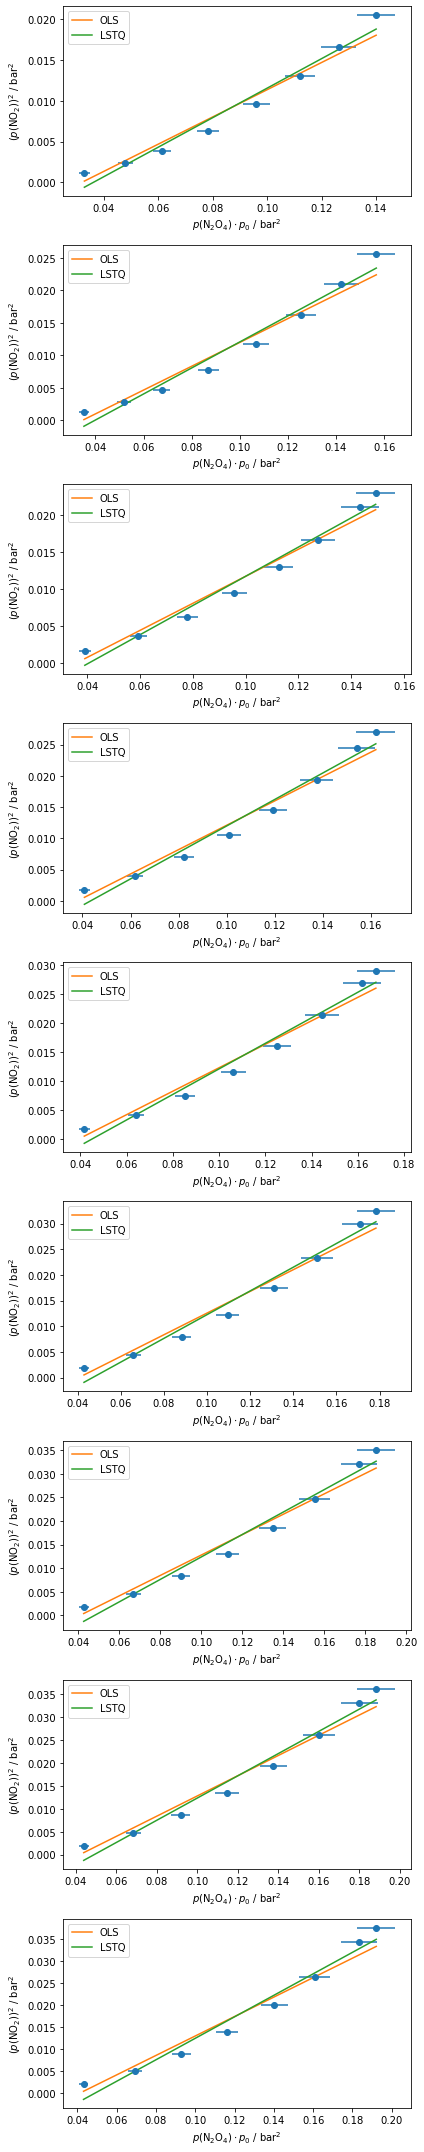

In [11]:
fig,ax=plt.subplots(nrows=9,figsize=(6,30))
#Da sowohl x als auch y fehlerbehaftet sind, soll eine orthogonale Regression stattfinden
from scipy import odr
def f(p, x):
    """Basic linear regression 'model' for use with ODR"""
    return (p[0] * x) + p[1]
params = np.empty((9,2))
for i in range(9):
    x_data = p_N2O4[i]/10**5
    y_data = (p_NO2[i]/10**5)**2
    x_err = dp_N2O4[i]/10**5
    y_err = (dp_NO2[i]/10**5)**2
    
    #Damit wir ein paar Schätzwerte als Ausgangparameter haben
    linreg = linregress(x_data, y_data)
    print(linreg)
    linear = odr.Model(f)
    mydata = odr.RealData(x_data,y_data,sx=x_err,sy=y_err)
    myodr = odr.ODR(mydata,linear,beta0=linreg[0:2])
    myoutput = myodr.run()
    slope,intercept = myoutput.beta
    slope_err,intercept_err=myoutput.sd_beta
    params[i,0],params[i,1] = slope,slope_err
    print(np.array([[slope,slope_err],[intercept,intercept_err]]))
    ax[i].errorbar(x_data,y_data,xerr=x_err,yerr=y_err,ls="None",marker='o')
    ax[i].plot(x_data,slope*x_data+intercept,label='OLS')
    ax[i].plot(x_data,linreg[0]*x_data+linreg[1],label="LSTQ")
    ax[i].set_ylabel("$(p(\mathrm{NO}_2))^{2}$ / bar$^{2}$")
    ax[i].set_xlabel("$p(\mathrm{N}_{2}\mathrm{O}_{4}) \cdot p_{0} $ / bar$^{2}$")
    ax[i].legend()
plt.tight_layout()
plt.show()
plt.close()

## Vierter Auswertungsschritt
Im nächsten Auswertungsschritt ist von euch eine Auftragung von $\ln(K_p)$ gegen $T^{-1}$ anzufertigen. Für die Fehlerbalken müsst ihr die Unsicherheit $\Delta\ln(K_p)$ bestimmen und diese ebenfalls einzeichnen! __(Schaue wegen Ausgleichsgeraden!)__

[-6.559e+02  4.261e-01]
[193.198   0.602]


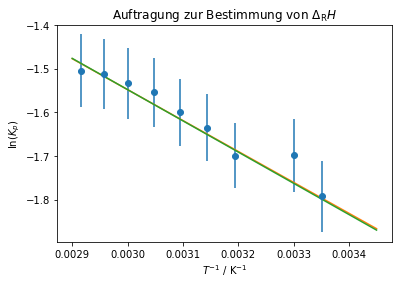

In [12]:
def linear(x,a,b):
    return a*x + b
k_p = params[:,0]
dk_p = params[:,1]
linreg = linregress(1/T_arr,np.log(k_p))
popt,pcov = curve_fit(linear,1/T_arr,np.log(k_p),absolute_sigma=True,sigma=(dk_p/k_p))
perr = np.sqrt(np.diag(pcov))
print(popt)
print(perr)
plt.errorbar(1/T_arr,np.log(k_p),xerr=delta_T/T_arr**2,yerr=dk_p/k_p,marker='o',ls="None",label="Messwerte")
plt.plot(np.linspace(0.0029,0.00345,10**6),linreg.slope*np.linspace(0.0029,0.0035,10**6) + linreg.intercept)
plt.plot(np.linspace(0.0029,0.00345,10**6),linear(np.linspace(0.0029,0.0035,10**6),popt[0],popt[1]))
plt.xlabel("$T^{-1}$ / $\mathrm{K}^{-1}$")
plt.ylabel("$\ln(K_p)$")
plt.title("Auftragung zur Bestimmung von $\Delta_\mathrm{R} H$")
plt.show()
plt.close()

Wie könnt ihr aus dieser Auftragung die Reaktionsenthalpie $\Delta_\mathrm{R} H$ erhalten?

In [13]:
H_r = -linreg.slope/R
dH_r = linreg.stderr/R
print(H_r,dH_r)

78.09335381234703 6.59452879201858


## Fünfter Auswertungsschritt
Als nächste Größe sind wir an der Reaktionsentropie $\Delta_\mathrm{R} S$ interessiert, welche ihr laut Aufgabenstellung aus der Steigung einer Auftragung von $R\cdot T\cdot \ln(K_p)$ zu bestimmen habt. Müsst ihr einen bestimmten Faktor berücksichtigen? Bedenkt bei den Fehlerbalken, dass die Unsicherheit $\Delta(R\cdot T\cdot\ln(K_p)$ mittels Gaußscher Fehlerfortpflanzung zu bestimmen ist, da sowohl $K_p$ als auch $T$ zwei voneinander unabhängige fehlerbehaftete Größen sind

In [14]:
kp,dkp = symbols("K_p ΔK_p")
expr = R*T*log(kp)
dexpr = sqrt((diff(expr,kp)*dkp)**2 + (diff(expr,T)*dT)**2)

expr = lambdify([T,kp],expr,"numpy")
dexpr = lambdify([T,dT,kp,dkp],dexpr,"numpy")

rtlnkp = np.empty((n,2))
drtlnkp = np.empty(n)
for index,temp in enumerate(T_arr):
    rtlnkp[index,0] = temp
    rtlnkp[index,1] = expr(temp,k_p[index])
    drtlnkp[index] = dexpr(temp,delta_T,k_p[index],dk_p[index])

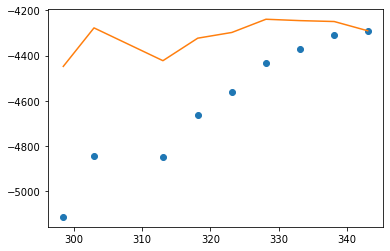

In [18]:
#Irgendwo ist ein Fehler

plt.plot(T_arr,expr(temp,k_p),marker="o",ls="None")
plt.plot(T_arr,np.log(k_p)*T_arr*R)
plt.show()
plt.close()

In [19]:
!tar chvfz notebook.tar.gz 

tar: Cowardly refusing to create an empty archive
Try 'tar --help' or 'tar --usage' for more information.
